1. Liczba próbek (w jednym okresie) sygnału rzeczywistego 𝑠(𝑡) = 𝑠𝑖𝑛(𝜋𝑡) wynosi 𝑁, gdzie N jest potęgą 2.
-  Przyjmując N = 8 wykreślić przebieg sygnału spróbkowanego, widmo amplitudowe i fazowe oraz
zweryfikować eksperymentalnie słuszność twierdzenia Parsevala.
-  Wykreślić wykres przedstawiający czas wyznaczania widma sygnału dyskretnego za pomocą
algorytmu FFT w funkcji liczby próbek 𝑁 = 2^𝑙, 𝑙 ∈ ℕ. Skomentować kształt otrzymanego wykresu
odnosząc się do teoretycznej złożoności obliczeniowej algorytmu FFT

****IMPORTANT****

1. ## ona mowila zeby wyzerowac czesc urojona gdy jest bardzo bliska 0 -- poprawilem to ##

2. ## oraz zeby twierdzenie parsevala wziac z 4 wykladu - wziete i poprawione ##

3. ## liczenie czasu trzeba poprawic - kilka razy puscic i usrednic ##


In [3]:
from matplotlib import pyplot as plt
from scipy.fft import fft, fftfreq
import numpy as np
import time


Przyjmując N = 8 wykreślić przebieg sygnału spróbkowanego, widmo amplitudowe i fazowe oraz
zweryfikować eksperymentalnie słuszność twierdzenia Parsevala.

Widmo amplitudowe:
[5.02733949 1.76536686 0.41421356 0.23463314 0.19891237 0.23463314
 0.41421356 1.76536686]
Widmo fazowe:
[-0.          3.14159265 -3.14159265 -3.14159265 -3.14159265  3.14159265
  3.14159265 -3.14159265]
Parseval
left:  4.0
right:  3.9999999999999996
Parseval proven?  True


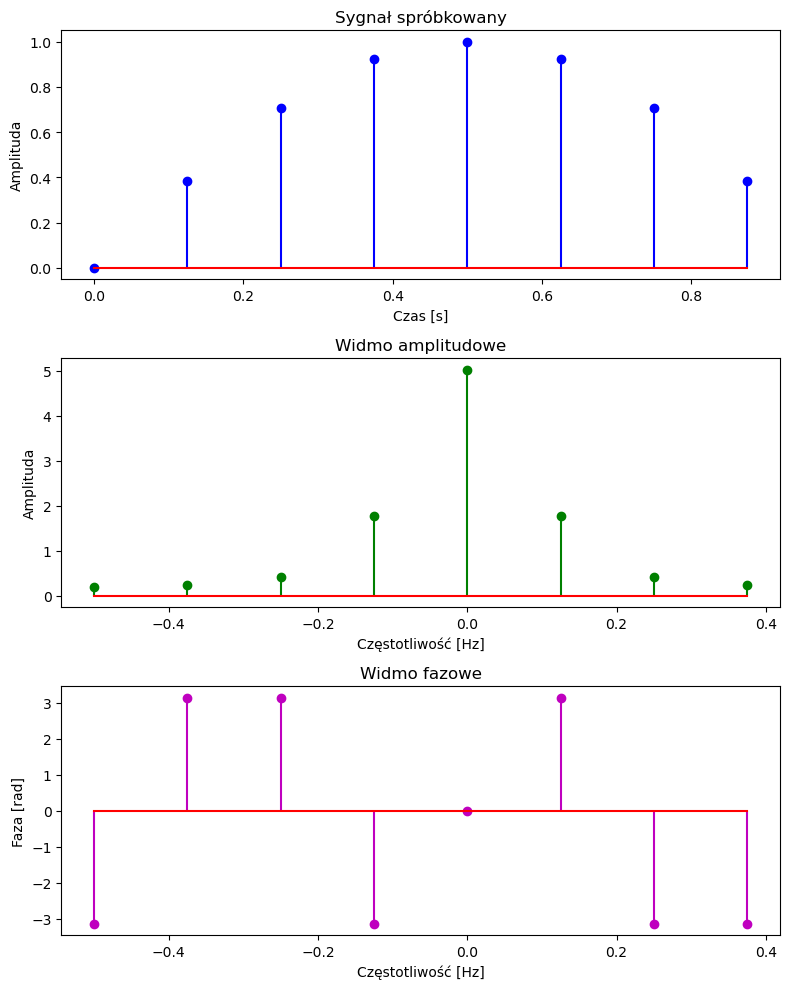

In [25]:
N = 8                                       # liczba próbek
t = np.linspace(0.0, 1, N, endpoint=False)  # czas próbkowania, liczba próbek N
signal = np.sin(np.pi * t)                  # sygnał s(t) = sin(πt)

def calc_spectrum(signal):
    return fft(signal)

def calc_amplitude_spectrum(signal):
    return np.abs(calc_spectrum(signal))

def calc_phase_spectrum(signal):
    angles = np.angle(calc_spectrum(signal))
    
    zero_angles = abs(angles) < 0.01
    angles *= ~zero_angles
    
    return angles

print('Widmo amplitudowe:')
print(calc_amplitude_spectrum(signal))
print('Widmo fazowe:')
print(calc_phase_spectrum(signal))

def calc_parseval_left(signal):
    return np.sum(np.abs(signal) ** 2)

def calc_parseval_right(spectrum):
    return np.sum(np.abs(spectrum) ** 2) / N

def calc_freq_power(signal):
    spectrum = calc_spectrum(signal)
    return (1/N**2) * np.sum(np.abs(spectrum) ** 2)

def prove_parseval(signal):
    spectrum = calc_spectrum(signal)
    print("Parseval")
    print("left: ", calc_parseval_left(signal))
    print("right: ", calc_parseval_right(spectrum))
    return round(calc_parseval_left(signal), 3) == round(calc_parseval_right(spectrum), 3)

print('Parseval proven? ', prove_parseval(signal))

# plot
spectrum = calc_spectrum(signal)
amplitude_spectrum = calc_amplitude_spectrum(signal)
phase_spectrum = calc_phase_spectrum(signal)
freqs = fftfreq(N)

fig, axs = plt.subplots(3, 1, figsize=(8, 10))

axs[0].stem(t, signal, linefmt='b-', markerfmt='bo', basefmt="r-")
axs[0].set_title("Sygnał spróbkowany")
axs[0].set_xlabel("Czas [s]")
axs[0].set_ylabel("Amplituda")

axs[1].stem(freqs, amplitude_spectrum, linefmt='g-', markerfmt='go', basefmt="r-")
axs[1].set_title("Widmo amplitudowe")
axs[1].set_xlabel("Częstotliwość [Hz]")
axs[1].set_ylabel("Amplituda")

axs[2].stem(freqs, phase_spectrum, linefmt='m-', markerfmt='mo', basefmt="r-")
axs[2].set_title("Widmo fazowe")
axs[2].set_xlabel("Częstotliwość [Hz]")
axs[2].set_ylabel("Faza [rad]")

plt.tight_layout()
plt.show()

Wykreślić wykres przedstawiający czas wyznaczania widma sygnału dyskretnego za pomocą
algorytmu FFT w funkcji liczby próbek 𝑁 = 2^𝑙, 𝑙 ∈ ℕ. Skomentować kształt otrzymanego wykresu
odnosząc się do teoretycznej złożoności obliczeniowej algorytmu FFT

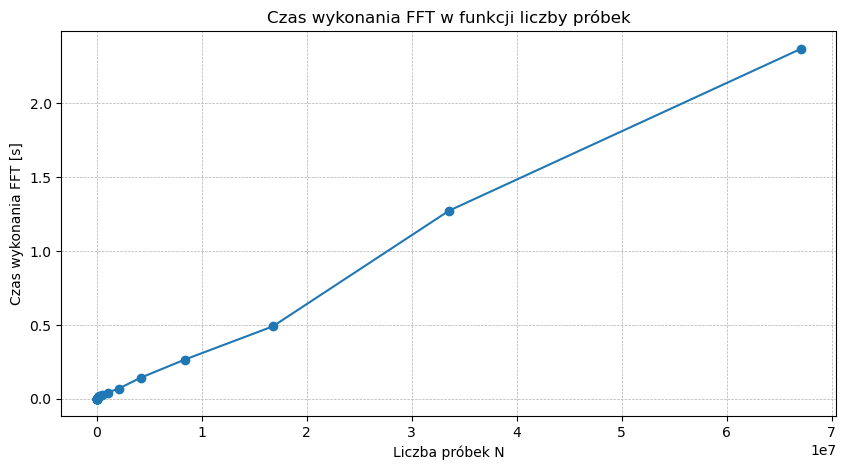

In [5]:
l = np.arange(1, 27)
N_l = 2 ** l
exec_times = []

for n in N_l:
    signal = np.random.rand(n)

    start = time.perf_counter()
    fft(signal)
    stop = time.perf_counter()

    exec_times.append(stop - start)

plt.figure(figsize=(10, 5))
plt.plot(N_l, exec_times, marker='o', linestyle='-')
plt.xlabel("Liczba próbek N")
plt.ylabel("Czas wykonania FFT [s]")
plt.title("Czas wykonania FFT w funkcji liczby próbek")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()